In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import numpy as np
import pandas as pd
import re, sys, os, csv
from many_stop_words import get_stop_words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
!pip install many_stop_words

  Created wheel for many-stop-words: filename=many_stop_words-0.2.2-cp36-none-any.whl size=26238 sha256=ad1fbb91fa0e4c21f6cb53a76ad97cfc4c61c58f469378968c67b98ce5418672
  Stored in directory: /root/.cache/pip/wheels/cb/70/60/6cd0b179da831dc80b5b07bd58dbf4cd99fa82b289eb41ada8
Successfully built many-stop-words


In [0]:
stop_words = list(get_stop_words('en'))        #About 900 stop words
set(stopwords.words('english'))
nltk_words = list(stopwords.words('english'))   #About 150 stop words
stop_words.extend(nltk_words)

In [0]:
def word_prob(word): return dictionary[word] / total
def words(text): return re.findall('[a-z]+', text.lower())
dictionary = Counter(words(open('merged.txt').read()))
max_word_length = max(map(len, dictionary))
total = float(sum(dictionary.values()))

def viterbi_segment(text):
    probs, lasts = [1.0], [0]
    for i in range(1, len(text) + 1):
        prob_k, k = max((probs[j] * word_prob(text[j:i]), j)
                        for j in range(max(0, i - max_word_length), i))
        probs.append(prob_k)
        lasts.append(k)
    words = []
    i = len(text)
    while 0 < i:
        words.append(text[lasts[i]:i])
        i = lasts[i]
    words.reverse()
    return words, probs[-1]
def fix_hashtag(text):
    text = text.group().split(":")[0]
    text = text[1:] # remove '#'
    try:
        test = int(text[0])
        text = text[1:]
    except:
        pass
    output = ' '.join(viterbi_segment(text)[0])
    #print(output)
    return output

def clean_tweet( tweet):
        tweet = tweet.lower()
        tweet = re.sub("(#[A-Za-z0-9]+)", fix_hashtag, tweet)
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def remove_stopwords(word_list):
        filtered_tweet=""
        for word in word_list:
            word = word.lower() 
            if word not in stopwords.words("english"):
                filtered_tweet=filtered_tweet + " " + word
        
        return filtered_tweet.lstrip()




In [0]:
data4 = pd.read_csv('/content/data_output1.csv')

In [0]:
data = pd.read_csv('iseardataset.csv')

In [0]:
data = data[['text','label']]

In [0]:
data1= pd.read_csv('data.csv')

In [0]:
data2= pd.read_csv('text_emotion.csv')

In [0]:
data3= pd.read_csv('Equity-Evaluation-Corpus.csv')

In [0]:
data3=data3[['Sentence','Emotion']]

In [13]:
data3[:5]

,Sentence,Emotion
0,Alonzo feels angry.,anger
1,Alonzo feels furious.,anger
2,Alonzo feels irritated.,anger
3,Alonzo feels enraged.,anger
4,Alonzo feels annoyed.,anger


In [0]:
data2=data2[['sentiment','content']]

In [0]:
data1.columns = ['text','label']

In [0]:
data2.columns = ['label','text']

In [0]:
data3.columns = ['text','label']

In [18]:
data['label'].value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1050
Name: label, dtype: int64

In [19]:
data3['label'].value_counts()

joy        2100
sadness    2100
anger      2100
fear       2100
Name: label, dtype: int64

In [20]:
data2['label'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: label, dtype: int64

In [21]:
data1['label'].value_counts()

1    16297
2    15938
0     9643
3     4301
4     1108
Name: label, dtype: int64

In [0]:
data1 = data1.loc[data1['label'].isin(['1','2','3','4'])]

In [23]:
data1['label'].value_counts()

1    16297
2    15938
3     4301
4     1108
Name: label, dtype: int64

In [0]:
#data2 = data2.loc[data2['label'].isin(['worry','enthusiasm ','fun','happiness','sadness','hate','anger'])]

In [41]:
#data2['label'].value_counts()

worry        8459
happiness    5209
sadness      5165
fun          1776
hate         1323
anger         110
Name: label, dtype: int64

In [0]:
data = data.loc[data['label'].isin(['fear','joy','sadness','anger'])]

In [25]:
data['label'].value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
Name: label, dtype: int64

In [0]:
data4 = pd.concat([data1,data,data3], axis=0)

In [5]:
data4

,text,label
0,sickening i hurt for florida later for the wha...,anger
1,this rainfall is a savage y fall when am in d ...,anger
2,angry guy screws his gf in very rude manner po...,anger
3,silence is better when you re angry and frustr...,anger
4,it s your smile which makes me cool and calm w...,anger
...,...,...
50368,The conversation with my mom was funny.,happy
50369,The conversation with my mom was hilarious.,happy
50370,The conversation with my mom was amazing.,happy
50371,The conversation with my mom was wonderful.,happy


In [6]:
data4['label'].value_counts()

happy    19489
sad      19120
hate      4301
anger     4287
fear      3176
Name: label, dtype: int64

In [0]:
for index, row in data4.iterrows():
    if (row["label"] == 1):
        row["label"] = "happy"
    if (row["label"] == 2):
        row["label"] = "sad"
    if (row["label"] == 3):
        row["label"] = "hate"
    if (row["label"] == 4):
        row["label"] = "anger"
    if (row["label"] == "sadness"):
        row["label"] = "sad"
    if (row["label"] == "joy"):
        row["label"] = "happy"

In [30]:
data4 = data4[~data4['label'].isnull()]
data4['label'].value_counts()

happy    19489
sad      19120
hate      4301
anger     4287
fear      3176
Name: label, dtype: int64

In [0]:

data4.text=data4.text.astype(str)

In [8]:
for row in data4['text']:
  tweet= clean_tweet(row)
  tweet = remove_stopwords(tweet.split())

NameError: ignored

In [37]:
data4['label']

0       anger
1       anger
2       anger
3       anger
4       anger
        ...  
8635    happy
8636    happy
8637    happy
8638    happy
8639    happy
Name: label, Length: 50373, dtype: object

In [0]:
data4.to_csv('data_output1.csv', index=False)

In [9]:
MAX_NB_WORDS = 40000 # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 30 # max length of text (words) including padding
VALIDATION_SPLIT = 0.2
EMBEDDING_DIM = 200 # embedding dimensions for word vectors (word2vec/GloVe)
GLOVE_DIR = "/content/glove.6B.50d.txt"
print("[i] Loaded Parameters:\n",
      MAX_NB_WORDS,MAX_SEQUENCE_LENGTH+5,
      VALIDATION_SPLIT,EMBEDDING_DIM,"\n",
      GLOVE_DIR)

[i] Loaded Parameters:
 40000 35 0.2 200 
 /content/glove.6B.50d.txt


In [10]:
import numpy as np
import pandas as pd
import re, sys, os, csv, keras, pickle

Using TensorFlow backend.


In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten, Concatenate
from keras.layers import Conv1D, MaxPooling1D,Add, Embedding, Dropout, LSTM, GRU, Bidirectional
from keras.models import Model
from keras import backend as K
from keras.engine.topology import Layer, InputSpec
print("[+] Using Keras version",keras.__version__)

[+] Using Keras version 2.2.5


In [12]:
texts=[]
for row in data4['text']:
        texts.append(row)
print("Done!")

Done!


In [13]:
texts[:5]

['sickening i hurt for florida later for the what if s and i know how they feel no you don t i can t imagin',
 'this rainfall is a savage y fall when am in d club n when am home its hot like hell without no light angry',
 'angry guy screws his gf in very rude manner portsmouth',
 'silence is better when you re angry and frustrated reacting to it will fuel the pain',
 'it s your smile which makes me cool and calm when i am sad or angry smile cool calm sad angry edits by birdies yo']

In [0]:
data4.loc[data4['label'] =='happy' , 'label'] = 0
data4.loc[data4['label'] =='sad' , 'label'] = 1
data4.loc[data4['label'] =='hate' , 'label'] = 2
data4.loc[data4['label'] =='anger' , 'label'] = 3
data4.loc[data4['label'] =='fear' , 'label'] = 4


In [21]:
data4['label'].value_counts()

0    19489
1    19120
2     4301
3     4287
4     3176
Name: label, dtype: int64

In [85]:
#labels=[]
#for row in data4['label']:
 #       labels.append(row)
#print("Done!")

Done!


In [0]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)

In [15]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("[i] Saved word tokenizer to file: tokenizer.pickle")

[i] Saved word tokenizer to file: tokenizer.pickle


In [0]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [17]:
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('[i] Found %s unique tokens.' % len(word_index))
data_int = pad_sequences(sequences, padding='pre', maxlen=(MAX_SEQUENCE_LENGTH-5))
data = pad_sequences(data_int, padding='post', maxlen=(MAX_SEQUENCE_LENGTH))

[i] Found 32221 unique tokens.


In [18]:
data[1]

array([    0,    24, 15191,    14,     4, 15192,   448,   997,    25,
          90,     9,   181,   905,   325,    25,    90,    97,   101,
         360,    47,   583,   294,    50,  1043,    78,     0,     0,
           0,     0,     0], dtype=int32)

In [22]:
#labels = to_categorical(np.asarray(labels)) # convert to one-hot encoding vectors
print('[+] Shape of data tensor:', data.shape)
#print('[+] Shape of label tensor:', labels.shape)


# Y contained some other garbage, so null check was not enough
#df = df[df['y'].str.isnumeric()]
labels = to_categorical(data4['label'], num_classes=5)
print(labels[:10])
print('[+] Shape of label tensor:', labels.shape)

[+] Shape of data tensor: (50373, 30)
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
[+] Shape of label tensor: (50373, 5)


In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

In [24]:
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

print('[i] Number of entries in each category:')
print("[+] Training:\n",y_train.sum(axis=0))
print("[+] Validation:\n",y_val.sum(axis=0))

[i] Number of entries in each category:
[+] Training:
 [15600. 15273.  3441.  3453.  2532.]
[+] Validation:
 [3889. 3847.  860.  834.  644.]


In [0]:
EMBEDDING_DIM = 50

In [26]:
embeddings_index = {}
f = open(GLOVE_DIR)
print("[i] Loading GloVe from:",GLOVE_DIR,"...",end="")
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\n[+] Proceeding with Embedding Matrix...", end="")
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
print("[i] Completed!")

[i] Loading GloVe from: /content/glove.6B.50d.txt ...Done.
[+] Proceeding with Embedding Matrix...[i] Completed!


In [0]:
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [0]:
def initial_boost(epoch):
    if epoch==0: return float(8.0)
    elif epoch==1: return float(4.0)
    elif epoch==2: return float(2.0)
    elif epoch==3: return float(1.5)
    else: return float(1.0)

In [0]:
def step_cyclic(epoch):
    try:
        l_r, decay = 1.0, 0.0001
        if epoch%33==0:multiplier = 10
        else:multiplier = 1
        rate = float(multiplier * l_r * 1/(1 + decay * epoch))
        #print("Epoch",epoch+1,"- learning_rate",rate)
        return rate
    except Exception as e:
        print("Error in lr_schedule:",str(e))
        return float(1.0)

In [30]:
embedding_matrix_ns = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix_ns[i] = embedding_vector
print("Completed!")

Completed!


In [31]:

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

# static channel
embedding_layer_frozen = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)
embedded_sequences_frozen = embedding_layer_frozen(sequence_input)

# non-static channel
embedding_layer_train = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix_ns],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
embedded_sequences_train = embedding_layer_train(sequence_input)

In [32]:
l_lstm1f = Bidirectional(LSTM(6,return_sequences=True,dropout=0.3, recurrent_dropout=0.0))(embedded_sequences_frozen)
l_lstm1t = Bidirectional(LSTM(6,return_sequences=True,dropout=0.3, recurrent_dropout=0.0))(embedded_sequences_train)
l_lstm1 = Concatenate(axis=1)([l_lstm1f, l_lstm1t])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from keras import regularizers

In [0]:
l_conv_2 = Conv1D(filters=24,kernel_size=2,activation='relu')(l_lstm1)
l_conv_2 = Dropout(0.3)(l_conv_2)
l_conv_3 = Conv1D(filters=24,kernel_size=3,activation='relu')(l_lstm1)
l_conv_3 = Dropout(0.3)(l_conv_3)

l_conv_5 = Conv1D(filters=24,kernel_size=5,activation='relu',)(l_lstm1)
l_conv_5 = Dropout(0.3)(l_conv_5)
l_conv_6 = Conv1D(filters=24,kernel_size=6,activation='relu',kernel_regularizer=regularizers.l2(0.0001))(l_lstm1)
l_conv_6 = Dropout(0.3)(l_conv_6)

l_conv_8 = Conv1D(filters=24,kernel_size=8,activation='relu',kernel_regularizer=regularizers.l2(0.0001))(l_lstm1)
l_conv_8 = Dropout(0.3)(l_conv_8)

conv_1 = [l_conv_6,l_conv_5, l_conv_8,l_conv_2,l_conv_3]

l_lstm_c = Concatenate(axis=1)(conv_1)

In [0]:
l_conv_4f = Conv1D(filters=12,kernel_size=4,activation='relu',kernel_regularizer=regularizers.l2(0.0001))(embedded_sequences_frozen)
l_conv_4f = Dropout(0.3)(l_conv_4f)
l_conv_4t = Conv1D(filters=12,kernel_size=4,activation='relu',kernel_regularizer=regularizers.l2(0.0001))(embedded_sequences_train)
l_conv_4t = Dropout(0.3)(l_conv_4t)

l_conv_3f = Conv1D(filters=12,kernel_size=3,activation='relu',)(embedded_sequences_frozen)
l_conv_3f = Dropout(0.3)(l_conv_3f)
l_conv_3t = Conv1D(filters=12,kernel_size=3,activation='relu',)(embedded_sequences_train)
l_conv_3t = Dropout(0.3)(l_conv_3t)

l_conv_2f = Conv1D(filters=12,kernel_size=2,activation='relu')(embedded_sequences_frozen)
l_conv_2f = Dropout(0.3)(l_conv_2f)
l_conv_2t = Conv1D(filters=12,kernel_size=2,activation='relu')(embedded_sequences_train)
l_conv_2t = Dropout(0.3)(l_conv_2t)

conv_2 = [l_conv_4f, l_conv_4t,l_conv_3f, l_conv_3t, l_conv_2f, l_conv_2t]

l_merge_2 = Concatenate(axis=1)(conv_2)
l_c_lstm = Bidirectional(LSTM(12,return_sequences=True,dropout=0.3, recurrent_dropout=0.0))(l_merge_2)

In [36]:
l_merge = Concatenate(axis=1)([l_lstm_c, l_c_lstm])
l_pool = MaxPooling1D(4)(l_merge)
l_drop = Dropout(0.5)(l_pool)
l_flat = Flatten()(l_drop)
l_dense = Dense(26, activation='relu')(l_flat)
preds = Dense(5, activation='softmax')(l_dense)

In [0]:
from keras import optimizers
from keras import callbacks

In [38]:
model = Model(sequence_input, preds)
adadelta = optimizers.Adadelta(lr=0.9, rho=0.95, epsilon=None, decay=0.002)
lr_metric = get_lr_metric(adadelta)
model.compile(loss='categorical_crossentropy',
              optimizer=adadelta,
              metrics=['acc'])

In [0]:
tensorboard = callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=16, write_grads=True , write_graph=True)
model_checkpoints = callbacks.ModelCheckpoint("checkpoint-{val_loss:.3f}.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=0)
lr_schedule = callbacks.LearningRateScheduler(initial_boost)

In [40]:
model.summary()
model.save('BalanceNet.h5')

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 30, 50)       1611100     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 30, 50)       1611100     input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 30, 12)       2736        embedding_1[0][0]                
____________________________________________________________________________________________

In [41]:
print("Training Progress:")
model_log = model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=25, batch_size=128)

pandas.DataFrame(model_log.history).to_csv("history-balance.csv")

Training Progress:
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40299 samples, validate on 10074 samples
Epoch 1/25
40299/40299 [==============================] - 141s 4ms/step - loss: 1.2252 - acc: 0.4412 - val_loss: 1.0401 - val_acc: 0.5344
Epoch 2/25
40299/40299 [==============================] - 134s 3ms/step - loss: 1.0453 - acc: 0.5253 - val_loss: 0.9275 - val_acc: 0.6006
Epoch 3/25
40299/40299 [==============================] - 136s 3ms/step - loss: 0.9559 - acc: 0.5743 - val_loss: 0.8682 - val_acc: 0.6390
Epoch 4/25
40299/40299 [==============================] - 134s 3ms/step - loss: 0.9049 - acc: 0.6084 - val_loss: 0.8277 - val_acc: 0.6647
Epoch 5/25
40299/40299 [==============================] - 135s 3ms/step - loss: 0.8660 - acc: 0.6318 - val_loss: 0.7962 - val_acc: 0.6805
Epoch 6/25
40299/40299 [==============================] - 135s 3ms/step - loss: 0.8305 - acc: 0.6527 - val_loss: 0.7659 - val_acc: 0.6961
Epoch 7

NameError: ignored

In [156]:
!pip install keras==2.2.5

     |████████████████████████████████| 337kB 2.8MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [54]:
model_log = model.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=3, batch_size=128,
          callbacks=[tensorboard, model_checkpoints])

pd.DataFrame(model_log.history).to_csv("history-balance1.csv")

Train on 40299 samples, validate on 10074 samples


Epoch 1/3
40299/40299 [==============================] - 134s 3ms/step - loss: 0.6677 - acc: 0.7241 - val_loss: 0.6449 - val_acc: 0.7389

Epoch 2/3
40299/40299 [==============================] - 134s 3ms/step - loss: 0.6635 - acc: 0.7283 - val_loss: 0.6445 - val_acc: 0.7389
Epoch 3/3
40299/40299 [==============================] - 135s 3ms/step - loss: 0.6649 - acc: 0.7298 - val_loss: 0.6426 - val_acc: 0.7393


In [0]:
pd.DataFrame(model_log.history).to_csv("history-balance.csv")

In [0]:
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'
import itertools, pickle

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)


In [0]:
classes = [ "happy", "sad", "hate","anger","fear"]

In [0]:
#model_test = load_model('checkpoint-0.866.h5')
#model_test = load_model('best_weights.h5')
Y_test = np.argmax(y_val, axis=1) # Convert one-hot to index
#y_pred = model_test.predict(x_val)
y_pred = model.predict(x_val)
y_pred_class = np.argmax(y_pred,axis=1)
cnf_matrix = confusion_matrix(Y_test, y_pred_class)

In [58]:
print(classification_report(Y_test, y_pred_class, target_names=classes))

              precision    recall  f1-score   support

       happy       0.74      0.75      0.75      3889
         sad       0.69      0.73      0.71      3847
        hate       0.86      0.64      0.73       860
       anger       0.88      0.72      0.80       834
        fear       0.75      0.87      0.81       644

    accuracy                           0.74     10074
   macro avg       0.79      0.74      0.76     10074
weighted avg       0.75      0.74      0.74     10074



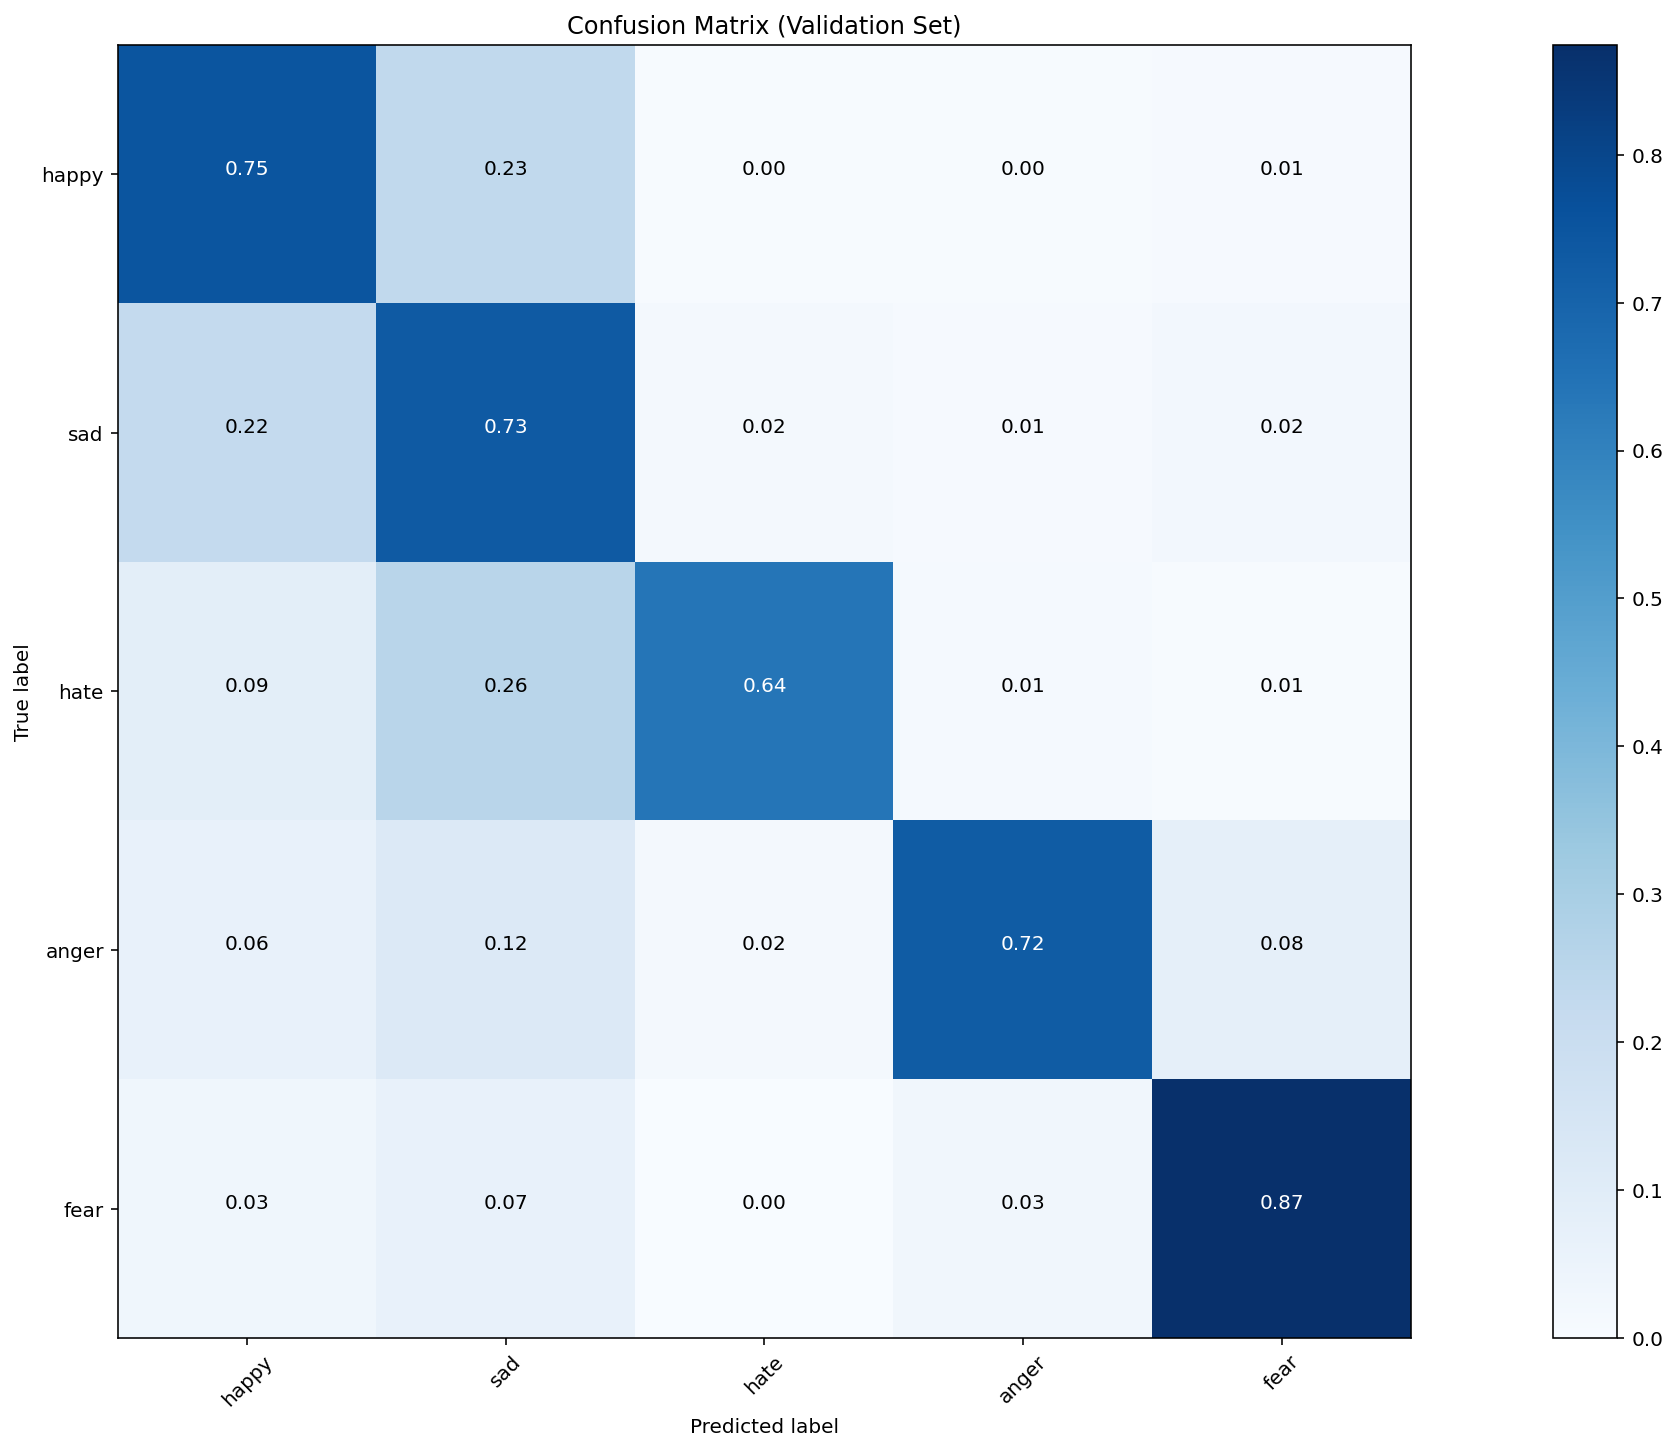

In [59]:
def plot_confusion_matrix(cm, labels,
                          normalize=True,
                          title='Confusion Matrix (Validation Set)',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(20,10))
plot_confusion_matrix(cnf_matrix, labels=classes)

# precision = true_pos / (true_pos + false_pos)
# recall = true_pos / (true_pos + false_neg)

In [0]:
text = ["I salute you for the bravery and sacrifice! A true hero indeed.",
        "I am sorry but I trust HRW I damned sight more than the PAP and it's cronies! Off course the PAP will say that they (HRW) made things up...despite of the fact that SG is a dictator state!?",
        "PAP are taking the piss again!",
        "Thought he sold his kidney to buy it; Instead, he bought a kidney then bought the car Filthy rich This is why we need communism",
        "Somebody needs to water Tharman's head, hair needs to be grown there",
        "what a nuisance fk. a proper clean and flat footpath,,now obstructed by sharedbikes..! which idiotic MP allowed this to happen?"
       ]

In [61]:
sequences_test = tokenizer.texts_to_sequences(text)
data_int_t = pad_sequences(sequences_test, padding='pre', maxlen=(MAX_SEQUENCE_LENGTH-5))
data_test = pad_sequences(data_int_t, padding='post', maxlen=(MAX_SEQUENCE_LENGTH))
y_prob = model.predict(data_test)
for n, prediction in enumerate(y_prob):
    pred = y_prob.argmax(axis=-1)[n]
    print(text[n],"\nPrediction:",classes[pred],"\n")

I salute you for the bravery and sacrifice! A true hero indeed. 
Prediction: happy 

I am sorry but I trust HRW I damned sight more than the PAP and it's cronies! Off course the PAP will say that they (HRW) made things up...despite of the fact that SG is a dictator state!? 
Prediction: sad 

PAP are taking the piss again! 
Prediction: sad 

Thought he sold his kidney to buy it; Instead, he bought a kidney then bought the car Filthy rich This is why we need communism 
Prediction: sad 

Somebody needs to water Tharman's head, hair needs to be grown there 
Prediction: sad 

what a nuisance fk. a proper clean and flat footpath,,now obstructed by sharedbikes..! which idiotic MP allowed this to happen? 
Prediction: hate 



In [0]:
text = ["never talk to me again",
        "do not get angry or frustrated or desperate or enraged or depressed or any such thing you are all educated",
        "i hate worthless insights",
        "it is the worst day of my life",
        "i love you mom",
        "stop saying bullshit",
        "congratulations on your acceptance",
        "your stupidity has no limt",
        "sounds like a fun plan",
        "i will celebrate soon",
        "the game just finished",
        "you are so mean"]

In [63]:
sequences_test = tokenizer.texts_to_sequences(text)
data_int_t = pad_sequences(sequences_test, padding='pre', maxlen=(MAX_SEQUENCE_LENGTH-5))
data_test = pad_sequences(data_int_t, padding='post', maxlen=(MAX_SEQUENCE_LENGTH))
y_prob = model.predict(data_test)
for n, prediction in enumerate(y_prob):
    pred = y_prob.argmax(axis=-1)[n]
    print(text[n],"\nPrediction:",classes[pred],"\n")

never talk to me again 
Prediction: sad 

do not get angry or frustrated or desperate or enraged or depressed or any such thing you are all educated 
Prediction: anger 

i hate worthless insights 
Prediction: hate 

it is the worst day of my life 
Prediction: sad 

i love you mom 
Prediction: happy 

stop saying bullshit 
Prediction: hate 

congratulations on your acceptance 
Prediction: happy 

your stupidity has no limt 
Prediction: sad 

sounds like a fun plan 
Prediction: happy 

i will celebrate soon 
Prediction: happy 

the game just finished 
Prediction: happy 

you are so mean 
Prediction: sad 

